[Vidéo 14](https://www.youtube.com/watch?v=IU5fuoYBTAM&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=14)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import random

In [2]:
df = pd.read_csv("../data/homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
4,1200,2,51.0
8,1310,3,50.0
10,1800,3,82.0
14,2250,3,101.0
13,1100,2,40.0


In [3]:
# Scaling : mettre toute les données du dataset à la même echelle pour que le modèle apprene mieux
# Using sklearn
sx = preprocessing.MinMaxScaler() # initialisation de l'echelle pour X
sy = preprocessing.MinMaxScaler() # initialisation de l'echelle pour y

In [4]:
# Inputs
scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [5]:
# Outputs
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [6]:
scaled_X.T # les lignes deviennent des colonnes

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [7]:
# Batch gradient descent
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_feature = X.shape[1] # area and bedrooms

    w = np.ones(shape=(number_of_feature)) # [1.0, 1.0] => [w1, w2]
    b = 0 # bias
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted =  np.dot(w, scaled_X.T) + b # w1 * area + w2 * bedrooms + b

        # Finding gradients
        w_grad = -(2/total_samples) * (X.T.dot(y_true - y_predicted)) # partial derivatives of error with respect to weights (each)
        b_grad = -(2/total_samples) * np.sum(y_true - y_predicted)

        # Ajusting
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true - y_predicted))

        if i % 10 == 0: # record metrics every 10 iterations
            cost_list.append(cost)
            epoch_list.append(i)
    
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

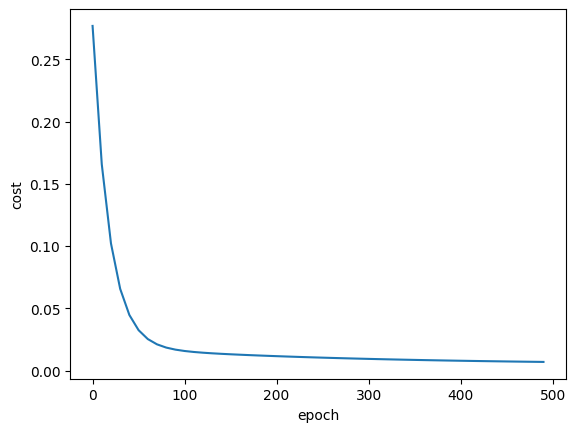

In [8]:
# Visualisation des perf ...
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [9]:
def predict(area, bedrooms, w, b):
    scaled_x = sx.transform([[area, bedrooms]])[0]

    scaled_price = w[0] * scaled_x[0] + w[1] * scaled_x[1] + b

    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600, 4, w, b)

c:\Users\S085091\Documents\EnvPython\Tensorflow_cours\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [10]:
predict(1000, 2, w, b)

c:\Users\S085091\Documents\EnvPython\Tensorflow_cours\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442363

In [11]:
predict(1500, 3, w, b)

c:\Users\S085091\Documents\EnvPython\Tensorflow_cours\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

In [12]:
# Stochastic gradient descent
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_feature = X.shape[1] # area and bedrooms

    w = np.ones(shape=(number_of_feature)) # [1.0, 1.0] => [w1, w2]
    b = 0 # bias
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b

        # Finding gradients
        w_grad = -(2/total_samples) * (sample_x.T.dot(sample_y - y_predicted)) # partial derivatives of error with respect to weights (each)
        b_grad = -(2/total_samples) * np.sum(sample_y - y_predicted)

        # Ajusting
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(sample_y - y_predicted))

        if i % 100 == 0: # record metrics every 100 iterations
            cost_list.append(cost)
            epoch_list.append(i)
    
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 10_000)
w_sgd, b_sgd, cost_sgd

(array([0.7047573 , 0.67506095]), -0.230005631854584, 0.0002956060879527321)

In [13]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

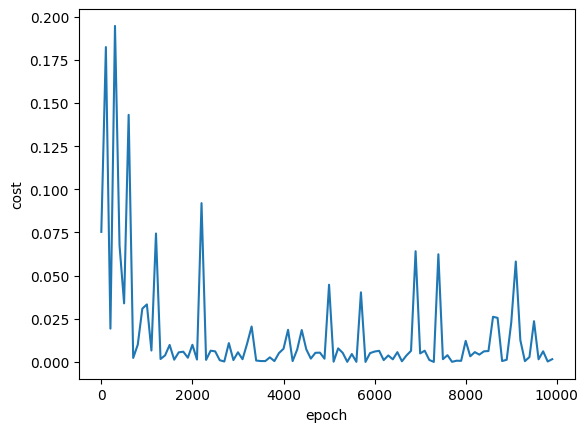

In [14]:
# Visualisation des perf ...
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [15]:
predict(2600, 4, w_sgd, b_sgd)

c:\Users\S085091\Documents\EnvPython\Tensorflow_cours\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.3529628857341

#### Exercise

---

Implement mini batch gradient descent in python and plot cost vs epoch graph. Mini batch is intermediate version of batch GD and stochastic GD. In stochastic we used one randomly picked training sample, In mini gradient descent you will use a batch of samples in each iterations. For example if you have total 50 training samples, you can take a batch of 10 samples, calculate cumulitive error for those 10 samples and then adjust weights. In SGD we adjust weights after every one sample. In Batch we adjust weights after going through all samples but in mini batch we do after every m samples (where m is batch size and it is 0 < m < n, where n is total number of samples

In [16]:
# Mini Batch gradient descent
def mini_batch_gradient_descent(X, y_true, epochs, learning_rate=0.01, nbr_samples=10):
    number_of_feature = X.shape[1] # area and bedrooms

    w = np.ones(shape=(number_of_feature)) # [1.0, 1.0] => [w1, w2]
    b = 0 # bias
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_indexs = [random.randint(0, total_samples - 1) for i in range(10)]
        samples_x = X[random_indexs]
        samples_y = y_true[random_indexs]
        y_predicted = np.dot(w, samples_x.T) + b

        # Finding gradients
        w_grad = -(2/total_samples) * (samples_x.T.dot(samples_y - y_predicted)) # partial derivatives of error with respect to weights (each)
        b_grad = -(2/total_samples) * np.sum(samples_y - y_predicted)

        # Ajusting
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(samples_y - y_predicted))

        if i % 100 == 0: # record metrics every 100 iterations
            cost_list.append(cost)
            epoch_list.append(i)
    
    return w, b, cost, cost_list, epoch_list

w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = mini_batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 10_000, nbr_samples=5)
w_mbgd, b_mbgd, cost_mbgd

(array([0.75549124, 0.41699149]), -0.11552416213732739, 0.0033722442288249685)

In [17]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

In [18]:
w_sgd, b_sgd, cost_sgd

(array([0.7047573 , 0.67506095]), -0.230005631854584, 0.0002956060879527321)

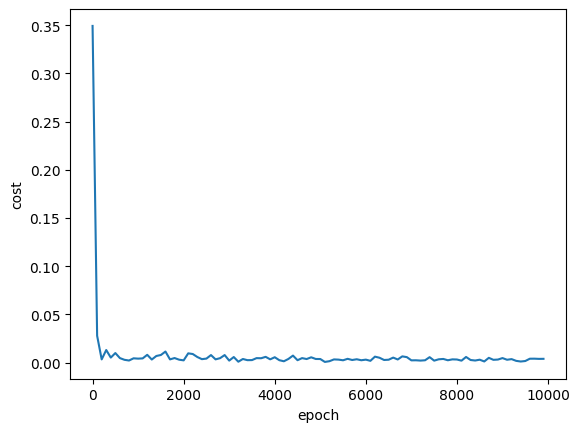

In [19]:
# Visualisation des perf ...
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mbgd, cost_list_mbgd)